# **Artificial Neural Network**

Logistic regression classification için iyi bir algoritmadır. 

Ancak modelin karmaşıklığı arttığında, model iyi bir accuracy değeri vermeyecektir.

Modelin karmaşıklığı arttığında artificial neural network'teki hidden layer sayısı artırılarak modelin daha iyi adapte olması sağlanır.

**Importing Libraries**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader #train ve test dataları pytorch'ta kullanılabilir hale getirilmek için DataLoader methodu kullanılır.

**Preparing Dataset**

In [ ]:
train = pd.read_csv(r"C:\Users\ŞEVVAL\Desktop\train.csv",dtype = np.float32)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
targets_numpy = train.label.values
features_numpy = (train.loc[:,train.columns != "label"].values)/255 #normalization

values methodu ile label pandas series'ten numpy array'e çevrilir.
Algoritmanın daha hızlı çalışması için rgb formatındaki pikseller 255'e bölünerek 0-1 aralığına çekilir.

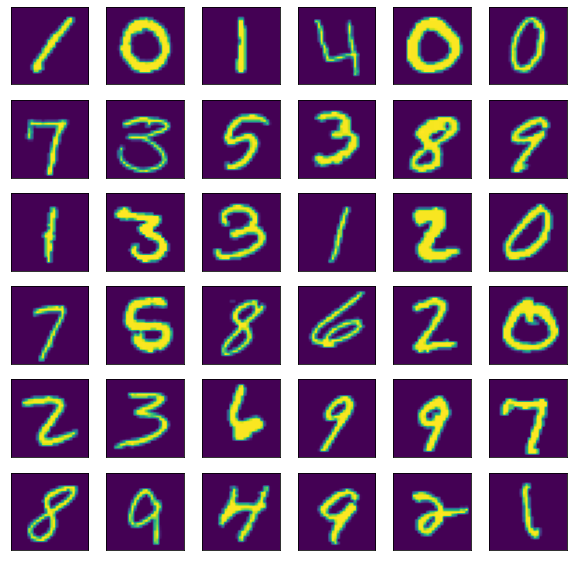

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [features_numpy[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

In [ ]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

In [ ]:
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

Numpy array'ler pytorch kütüphanesinde kullanılabilmek için tensor'e dönüştürülür.

In [ ]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size) #(10000/(36000/100)) = 29 -> epoch
num_epochs = int(num_epochs) #29 epoch

**batch size verinin kaça bölünerek train edileceğidir.**

Eğer data 1000 sample'dan oluşuyorsa batch size 100 olarak belirlendiğinde, data 100'er sample'dan oluşan 10 gruba ayrılır.

**Epoch train datası kullanılarak kaç defa training işleminin gerçekleştirileceğidir.**

Datada 33600 sample bulunmaktadır. batch size 100, epoch 29 olarak belirlenmiştir.

Bu durumda (33600)/(100) = 336 grup oluşacaktır.

Bir epoch 336 training işlemi gerçekleşeceğinden, bir epoch 336 iteration'dan oluşur.

Bu durumda 29 epoch'ta 9744 iteration bulunur, yaklaşık 10000 denilebilir.

In [ ]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [ ]:
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

DataLoader methoduyla dataset ve samplelar batch size'a göre combine edilir.

**Create ANN Model**

3 hidden layer kullanılacaktır.

Activation function olarak tanh, relu ve elu kullanılacaktır.

In [ ]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        #input dimension -> 28x28 =784
        #hidden dimension -> 150 olarak belirlendi.
        #output dimension -> 0-9 arası rakamlar oluştuğu için 10 olarak belirlendi.
        
        super(ANNModel, self).__init__() #ANN modeli nn.Module'ün initializer'ı çağırılarak inherit edilir.
        
        #784'ten node'dan 150 node'a düşmüştür.
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        #non linearity'i artırmak için 1. hidden layer'dan sonra activation function olarak relu kullanılmıştır.
        self.relu1 = nn.ReLU()
        
        #150 node'dan 150 node'a
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        #2. hidden layer'dan sonra tanh activation function kullanılmıştır.
        self.tanh2 = nn.Tanh()
        
        #150 node'dan 150 node'dan
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        ##3. hidden layer'dan sonra elu activation function kullanılmıştır.
        self.elu3 = nn.ELU()
        
        #150 node'dan 10 class olduğundan 10 node'a düşmüştür.
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x): #forward propagation'da layer'lar birbirine bağlanıp fully connected layer elde edilir.
        
        #1. hidden layer
        out = self.fc1(x)
        #activation function
        out = self.relu1(out)
        
        #2. hidden layer
        out = self.fc2(out)
        #activation function
        out = self.tanh2(out)
        
        #3. hidden layer
        out = self.fc3(out)
        #activation function
        out = self.elu3(out)
        
        #output layer'dan bir probabilistic bir değer olan y_head değeri oluşur.
        #Daha sonra y_head ve y_real değerleri loss function içerisine koyulup loss değeri hesaplanacaktır. -> loss(y_head,y_real)
        out = self.fc4(out)
        
        return out

Pytorch'ta initializer methodunda layerlar belirlenir.

forward methodunda ise layerlar birbirine bağlanır.

**Instantiate Model Class**

In [ ]:
input_dim = 28*28
hidden_dim = 150 
output_dim = 10

In [ ]:
#ANN Model
model = ANNModel(input_dim, hidden_dim, output_dim)

ANN modelinde input dimension, hidden dimension ve output dimension olmak üzere 3 parametre bulunur.

**Instantiate Loss Class**

In [ ]:
#Cross Entropy Loss 
error = nn.CrossEntropyLoss()

y_head değerinin gireceği softmax activation function CrossEntropyLoss methodunun içerisinde bulunur.
CrossEntropyLoss methodula loss değeri hesaplanır.

**Instantiate Optimizer Class**

In [ ]:
#SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Stochastic Gradient Descent yöntemi ile parametreler güncellenecektir.

**Training Model and Prediction**

In [ ]:
#ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        #view methoduyla görseller flatten yapılarak (1,784)'ten oluşan bir vektör haline getirilir.
        labels = Variable(labels)
        #backward propagation'da hesaplanan gradient'ler pytorch'ta accumulate edilebilmesi Variable yapısında olmalıdır.
        
        #türevler 0'lanır, eğer sıfırlanmazsa her adımda bir önceki adımdaki türevlerle toplanır.
        #türev değerleri sıfırlanmadan önce backward methoduyla Variable içerisinde accumulate edildiği için kaybolmamıştır. 
        optimizer.zero_grad()
        
        #Forward propagation yapılması için model çağrılır.
        outputs = model(train)
        
        #softmax ve cross entropy loss hesaplanır.
        loss = error(outputs, labels)
        
        #Calculating gradients
        loss.backward()
        #loss'un parametrelere göre türevi alınarak, parametrelerin ne kadar güncelleneceği bulunur.
        
        #parametreler update edilir. (w = w- learning_rate*gradient)
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0: #count 50 ve 50'nin katları olduğu sürece prediction işlemi gerçekleştirilir.
            
            #Calculate Accuracy         
            correct = 0 #doğru tahmin edilenler
            total = 0 #tahmin edilenlerin tümü
            
            #Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                #test isimli bir variable'a image'ler eşitlenir.
                
                #Forward propagation
                outputs = model(test)
                #0-9 arası classlardan prediction işlemi gerçekleştirilir.
                #probabilistic bir sonuç ortaya çıkar.
                
                #Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                #probabilistic değerlerden en olası olana (1'e en yakın olana) bakılır.
                
                #Total number of labels
                total += len(labels)
                #test datasında kaç sample olduğuna bakılır.

                #Total correct predictions
                correct += (predicted == labels).sum()
                #predicted ile total aynı ise doğru tahmindir, correct isimli variable'a eklenir.
            
            accuracy = 100 * (correct / float(total))
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0: #count 500'ün katı oldukça accuracy ve loss değerleri yazdırılır.
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.804972767829895  Accuracy: 78.79762268066406 %
Iteration: 1000  Loss: 0.4588417708873749  Accuracy: 88.01190185546875 %
Iteration: 1500  Loss: 0.22055798768997192  Accuracy: 89.71427917480469 %
Iteration: 2000  Loss: 0.2874373197555542  Accuracy: 90.82142639160156 %
Iteration: 2500  Loss: 0.3093506097793579  Accuracy: 91.85713958740234 %
Iteration: 3000  Loss: 0.12845087051391602  Accuracy: 92.63095092773438 %
Iteration: 3500  Loss: 0.24099425971508026  Accuracy: 93.30952453613281 %
Iteration: 4000  Loss: 0.06180529668927193  Accuracy: 93.91666412353516 %
Iteration: 4500  Loss: 0.29466933012008667  Accuracy: 94.35714721679688 %
Iteration: 5000  Loss: 0.10116935521364212  Accuracy: 94.83333587646484 %
Iteration: 5500  Loss: 0.1825646013021469  Accuracy: 94.98809814453125 %
Iteration: 6000  Loss: 0.20374563336372375  Accuracy: 95.23809814453125 %
Iteration: 6500  Loss: 0.09712083637714386  Accuracy: 95.41666412353516 %
Iteration: 7000  Loss: 0.12020864337682724  A

Logistic regression'da accuracy %86'ydı. 

ANN modeli ile aynı datayla %96'lık bir accuracy elde edilmiş oldu.

Model complexity arttıkça modelin başarısının da arttığı görülmektedir.

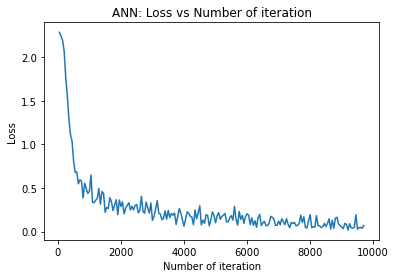

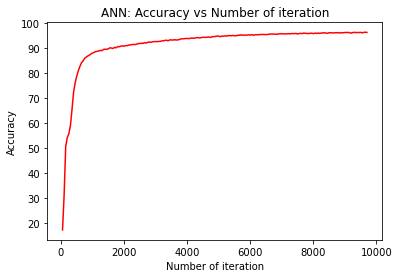

In [ ]:
#visualizing loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

#visualizing accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()